# Day4. CNN을 사용한 특징 기반 분류

> [CNN](https://hal.science/hal-03926082/document)을 학습하고, [VGG](https://arxiv.org/abs/1409.1556)에 대해서 알아보자

- LeNet 이전의 분류 작업
    - `Pattern`을 `수식적`으로 작성 => 분류기에 해당 수식을 사용해서 분류를 진행
        - 예를 들어, 1) 입력 이미지가 주어지면 해당 입력에 대해 수학적인 방식으로 입력이미지의 특징들을 추출(면,선,코너 등의 정보), 2) 해당 특징들을 기반으로 적절한 특징들을 선별해서 해당 특징들의 벡터와 같은 추가적인 정보를 획득, 3) 최종적으로 이러한 정보들을 활용해 사물을 인식하는 과정을 거침
    - 한계점
        - 특징 추출에 많은 사전지식이 포함되어 있어야 함
        - 특징 추출 과정에서 이러한 특징들을 어떻게 특징을 추출하는지에 따라 성능이 좌우
        - 새로운 문제(새로운 특징이 추가적으로 필요하거나 기존과는 다른 패턴이 보이는 경우)에는 다시 시스템을 구축

- CNN(convolution neural network)
    - CNN은 작은 필터를 이용해 이미지로부터 특징을 추출해내는 방법
        - 기존 모델은 모든 픽셀에 대해 가중치를 갖고 있고, 전체를 특징으로 이용하기 때문에 학습에 사용된 데이터에 관해서는 완벽에 가까울 정도로 특징을 잡아낼 수 있는데, 특징 위치가 바뀌게 되면 무용지물
        - 반대로 합성곱은 커널을 이미지 안에서 이리저리 움직이며 특징을 추출, 따라서 볼 수 있는 시야는 좁아지는 대신 위치와 무관하게 특징을 잡아 낼 수 있음
        - 이미지 전체에 가중치를 두는 모델은 이미지 크기가 커지면 학습해야 하는 가중치 개수도 늘어나는데, CNN 커널 크기는 변화가 없음, 즉 커널을 사용하면 이미지 크기와 무관하게 학습해야 하는 가중치 개수가 같음
        - 학습할 가중치도 줄어들고, 특징의 위치에 대해 어느 정도 자유로워졌으니 두 마리 토끼를 다 잡은 것

- `LeNet-5`
    - `convolution neural network`를 활용
    - CNN은 기존의 방식과는 다르게 이미지를 일정한 지역적인 패턴을 이용하는 특수한 구조
    - 다중 신경망 네트워크는 복잡하고, 고차원적이고, 비선형 mapping을 이미지 인식 작업에서 여러 클래스를 맞추는 작업을 통해 오차를 계산해 Gradient Descent 방법을 통해 학습
    - LeNet-5 이전의 패턴 인식 구조에서 Feature Extraction 작업은 CNN 구조를 통해 대체될 수 있고
    - Classifier Module은 Fully connected layer를 통해 대체될 수 있음
    - 이때 CNN과 Fully Connected layer이 가능하게 된 배경은 빠른 알고리즘과 적은 비용으로도 높은 성능의 컴퓨터를 사용할 수 있게 되면서 연산량이 많은 CNN과 Fully Connected layer를 사용할 수 있게 되었음

## LeNet-5 구현

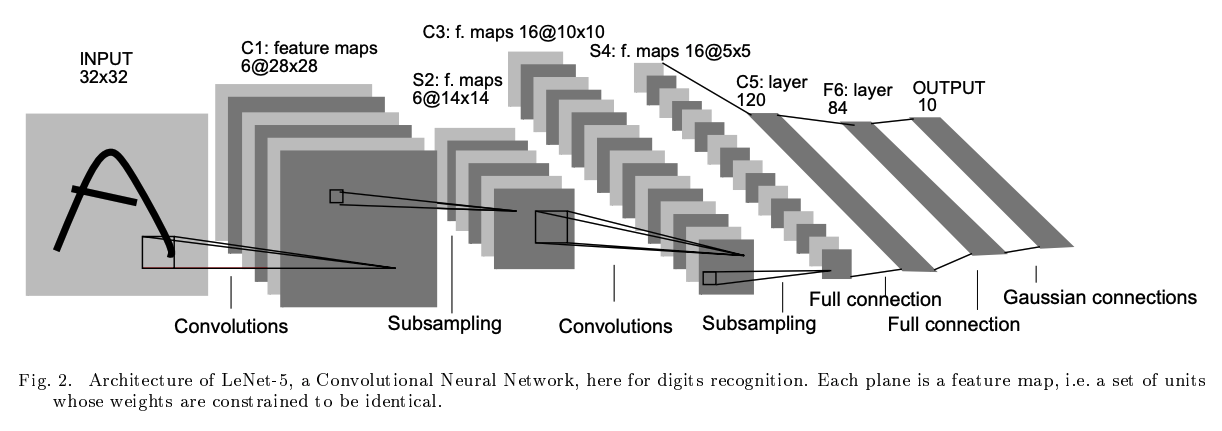

### Baseline Model with Multilayer Perceptrons

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

train = torchvision.datasets.MNIST('data', train=True, download=True)
test = torchvision.datasets.MNIST('data', train=True, download=True)
print(train.data.shape, train.targets.shape)
print(test.data.shape, test.targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([60000, 28, 28]) torch.Size([60000])


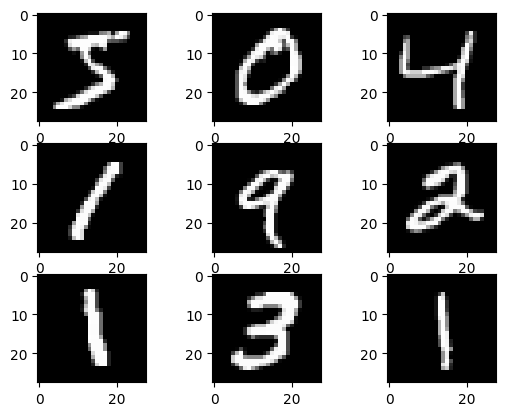

In [12]:
for i in range(9):
   plt.subplot(3, 3, i+1)
   plt.imshow(train.data[i], cmap='gray')
plt.show()

In [4]:
# each sample becomes a vector of values 0-1
X_train = train.data.reshape(-1, 784).float() / 255.0
y_train = train.targets
X_test = test.data.reshape(-1, 784).float() / 255.0
y_test = test.targets

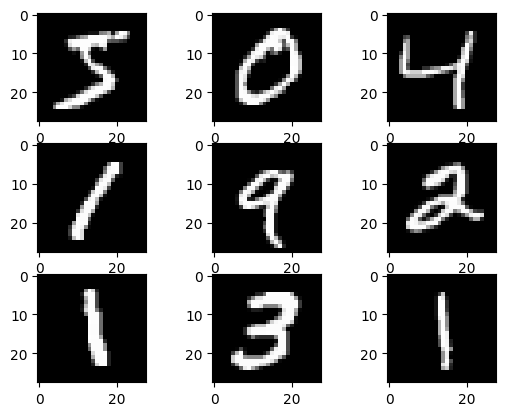

In [11]:
for i in range(9):
   plt.subplot(3, 3, i+1)
   plt.imshow(X_train[i].reshape(28,28), cmap='gray')
plt.show()

In [13]:
class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 784)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.layer2(x)
        return x

In [14]:
model = Baseline()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=100)

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    y_pred = model(X_test)
    acc = (torch.argmax(y_pred, 1) == y_test).float().mean()
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 84.24%
Epoch 1: model accuracy 87.51%
Epoch 2: model accuracy 88.83%
Epoch 3: model accuracy 89.66%
Epoch 4: model accuracy 90.27%
Epoch 5: model accuracy 90.67%
Epoch 6: model accuracy 91.13%
Epoch 7: model accuracy 91.45%
Epoch 8: model accuracy 91.68%
Epoch 9: model accuracy 92.01%


### Simple Convolutional Neural Network for MNIST

In [5]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,), (128,)),
])
train = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=100)
testloader = torch.utils.data.DataLoader(test, shuffle=True, batch_size=100)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        self.dropout = nn.Dropout(0.2)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(27*27*10, 128)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.relu1(self.conv(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu2(self.fc(self.flat(x)))
        x = self.output(x)
        return x

In [7]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in trainloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    acc = 0
    count = 0
    for X_batch, y_batch in testloader:
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum()
        count += len(y_batch)
    acc = acc / count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 71.64%
Epoch 1: model accuracy 79.48%
Epoch 2: model accuracy 81.65%
Epoch 3: model accuracy 86.09%
Epoch 4: model accuracy 87.39%
Epoch 5: model accuracy 88.19%
Epoch 6: model accuracy 88.75%
Epoch 7: model accuracy 89.58%
Epoch 8: model accuracy 89.31%
Epoch 9: model accuracy 89.65%


### LeNet-5 for MNIST

In [8]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.Tanh()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.act2 = nn.Tanh()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)
        self.act3 = nn.Tanh()

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(1*1*120, 84)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.pool1(x)
        x = self.act2(self.conv2(x))
        x = self.pool2(x)
        x = self.act3(self.conv3(x))
        x = self.act4(self.fc1(self.flat(x)))
        x = self.fc2(x)
        return x

In [9]:
model = LeNet5()

optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in trainloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    acc = 0
    count = 0
    for X_batch, y_batch in testloader:
        y_pred = model(X_batch)
        acc += (torch.argmax(y_pred, 1) == y_batch).float().sum()
        count += len(y_batch)
    acc = acc / count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 89.49%
Epoch 1: model accuracy 92.64%
Epoch 2: model accuracy 94.01%
Epoch 3: model accuracy 95.69%
Epoch 4: model accuracy 96.38%
Epoch 5: model accuracy 96.84%
Epoch 6: model accuracy 97.21%
Epoch 7: model accuracy 97.77%
Epoch 8: model accuracy 97.98%
Epoch 9: model accuracy 98.29%
